conda install -c conda-forge spacy
python -m spacy download en

In [1]:
import pandas as pd
import spacy
import string

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC



In [2]:
lyrics = pd.read_csv("SFALyrics.csv", dtype=str)
lyrics = lyrics[['lyrics', 'title', 'album']]
lyrics = lyrics[pd.notnull(lyrics['title'])]
lyrics['lyrics_2'] = lyrics['lyrics'].replace('\n',' ', regex=True)
lyrics.loc[lyrics['album'] == 'Dark Day/Light Years', 'album'] = 'Dark Days/Light Years'
lyrics.loc[lyrics['album'] == 'Gorilla', 'album'] = 'Guerilla'
lyrics.head()

lyrics.groupby('album').count()

,lyrics,title,lyrics_2
album,,,
Dark Days/Light Years,10,10,10
Fuzzy Logic,12,12,12
Guerilla,11,11,11
Hey! Venus,6,6,6
Love Kraft,11,11,11
Phantom Power,12,12,12
Radiator,10,10,10
Rings around the World,11,11,11


In [3]:

def clean(text):
    # split into words by white space
    words = str(text).lower().split()
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    return stripped

def unique_words(text):
    unique_words = set()
    for word in text:

        unique_words.add(word)
    return list(unique_words)   

In [4]:
lyrics['lyrics_3'] =  lyrics['lyrics_2'].apply(clean)
lyrics['unique'] =  lyrics['lyrics_3'].apply(unique_words)
lyrics['unique_num'] = lyrics['unique'].apply(len)
lyrics.head()

,lyrics,title,album,lyrics_2,lyrics_3,unique,unique_num
0,I had a soul transplant operation \nCoz my byp...,God! How me magic,Fuzzy Logic,I had a soul transplant operation Coz my bypa...,"[i, had, a, soul, transplant, operation, coz, ...","[man, transplant, magic, til, wouldnt, show, k...",43
1,"[Bunf:] \nHamster, turnin' round in your wheel...",Fuzzy Birds,Fuzzy Logic,"[Bunf:] Hamster, turnin' round in your wheel ...","[bunf, hamster, turnin, round, in, your, wheel...","[man, that, is, if, empower, know, pan, so, in...",76
2,"First time, I did it for the hell of it \nStuc...",Something 4 the weekend,Fuzzy Logic,"First time, I did it for the hell of it Stuck...","[first, time, i, did, it, for, the, hell, of, ...","[time, that, slow, unlucky, god, mind, was, go...",98
3,Locked in a sorry dream \nYou know we're drown...,Frisbee,Fuzzy Logic,Locked in a sorry dream You know we're drowni...,"[locked, in, a, sorry, dream, you, know, were,...","[dream, decapitate, brings, surprise, is, past...",60
4,I was lost \nLost on the bypass road \nCould b...,Hometown Unicorm,Fuzzy Logic,I was lost Lost on the bypass road Could be ...,"[i, was, lost, lost, on, the, bypass, road, co...","[born, like, toad, just, please, riding, back,...",47


In [5]:
lyrics.sort_values(by=['unique_num'], ascending=False, inplace=True)



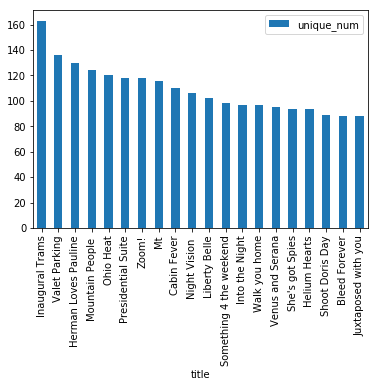

In [6]:
%matplotlib inline
lyrics.head(20).plot.bar(x='title', y='unique_num', rot=90)

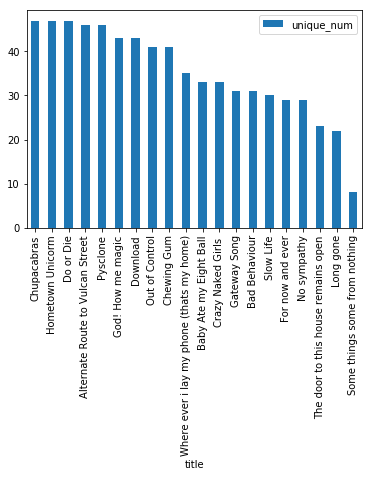

In [7]:
lyrics.tail(20).plot.bar(x='title', y='unique_num', rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a155bfb70>]],
      dtype=object)

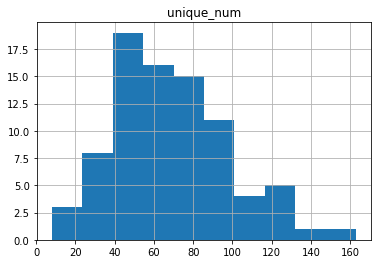

In [8]:
lyrics.hist()

[Text(0,0,'Dark Days/Light Years'),
 Text(0,0,'Phantom Power'),
 Text(0,0,'Radiator'),
 Text(0,0,'Love Kraft'),
 Text(0,0,'Rings around the World'),
 Text(0,0,'Guerilla'),
 Text(0,0,'Fuzzy Logic'),
 Text(0,0,'Hey! Venus')]

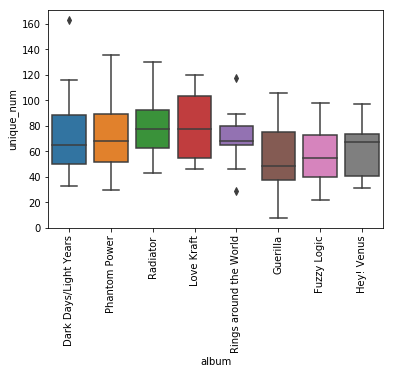

In [9]:
import seaborn as sns

j = lyrics[['album', 'title', 'unique_num']]

g = sns.boxplot( x=j["album"], y=j["unique_num"])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
nlp = spacy.load("en")
no_features = 1000

documents = lyrics['lyrics_2']

documents  = [re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", song) for song in documents]
documents = [word.lower() for word in documents]
documents  = " ".join(str(x) for x in documents)



# split into words by white space
words = documents.split()
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
print(stripped)

documents  = " ".join(str(x) for x in stripped)
documents = [documents]




['trams', 'inaugral', 'trams', 'trams', 'inaugral', 'trams', 'trams', 'i', 'will', 'design', 'a', 'town', 'in', 'the', 'image', 'of', 'your', 'face', 'round', 'the', 'wrinkles', 'of', 'your', 'eyes', 'my', 'footsteps', 'you', 'can', 'trace', 'we', 'could', 'promenade', 'down', 'infranasel', 'depression', 'the', 'streets', 'of', 'your', 'hands', 'will', 'never', 'feel', 'a', 'recession', 'its', 'a', 'secular', 'day', 'and', 'it', 'will', 'be', 'even', 'better', 'tomorrow', 'its', 'the', 'first', 'day', 'of', 'the', 'intergrated', 'transport', 'hub', 'let', 'us', 'celebrate', 'this', 'monumental', 'progress', 'we', 'have', 'reduced', 'emmisions', 'by', '75', 'trams', 'inaugral', 'trams', 'trams', 'inaugral', 'trams', 'trams', 'they', 'say', 'the', 'future', 'of', 'cement', 'is', 'set', 'in', 'stone', 'we', 'could', 'proclaim', 'a', 'republic', 'and', 'throw', 'away', 'the', 'throne', 'we', 'will', 'likely', '', 'spaceships', 'beep', 'by', 'the', 'speed', 'of', 'light', 'the', '', 'will',

In [12]:
import nltk
text = lyrics['lyrics_2']
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/PY3/english.pickle' not found.
  Please use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/Users/davidpugh/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

In [ ]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(stripped)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 10

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %s" %str(topic_idx))
        for i in topic.argsort()[:-no_top_words - 1:-1]:
            print(feature_names[i])
    

no_top_words = 5
display_topics(nmf, tfidf_feature_names, no_top_words)


In [ ]:
nlp = spacy.load("en")

print(lyrics['lyrics_2'][0])
doc =nlp(lyrics['lyrics_2'][0])


In [ ]:
doc[0:10]

In [ ]:
list(doc.sents)[0]

In [ ]:
lemmas = [token.lemma_ for token in doc if not token.is_stop]
lemmas

In [ ]:
remove = [' ', '  ']
[token.orth_ for token in doc if token.orth_ not in remove ]

In [ ]:
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

INFO_text = [text for text in train[train['Conference'] == 'INFOCOM']['Title']]
IS_text = [text for text in train[train['Conference'] == 'ISCAS']['Title']]
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()
IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()
INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)
INFO_common_words = [word[0] for word in INFO_counts.most_common(20)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the research papers for conference INFOCOM')
plt.show()

In [ ]:
stops = []
def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


lyrics['Text_After_Clean'] = lyrics['lyrics'].apply(normalize, lowercase=True, remove_stopwords=True)


In [ ]:
lyrics.head()